In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import my_library.gluex_style as gxs 
import os


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
os.nice(18)

18

In [3]:
df_pipkmks_signal = tools.get_dataframe('pipkmks', 'fall', 'signal').Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.BEAM_RANGE)
df_pipkmks_thrown = tools.get_dataframe('pipkmks', 'fall', 'signal', filtered=False, thrown=True).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS).Filter(kcuts.BEAM_RANGE)

In [35]:
hists = []
for t in range(1, 8):
    hist_signal = df_pipkmks_signal.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"pion_pz_{t}", f"pion_pz_{t}", 46, 0.7, 3), 'pip1_pz')
    hist_thrown = df_pipkmks_thrown.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"pion_pz_{t}", f"pion_pz_{t}", 46, 0.7, 3), 'PiPlus1_pz')
    # hist_signal = df_pipkmks_signal.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"kaon_pz_{t}", f"kaon_pz_{t}", 35, 1.5, 5), 'km_pz')
    # hist_thrown = df_pipkmks_thrown.Filter(kcuts.SELECT_T_BIN.format(t)).Histo1D((f"kaon_pz_{t}", f"kaon_pz_{t}", 35, 1.5, 5), 'KMinus_pz')

    hists.append((hist_signal, hist_thrown))
df_pipkmks_signal.Count().GetValue()
df_pipkmks_thrown.Count().GetValue()

84043257

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


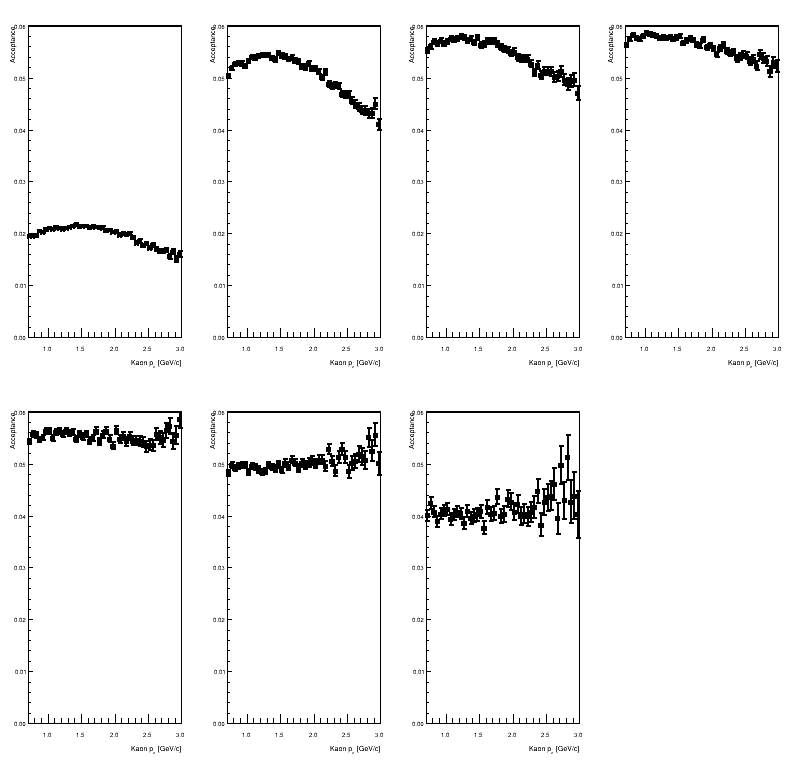

In [36]:
c = ROOT.TCanvas("c1", "c1", 800, 800)
c.Divide(4, 2)

acceptances = []
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist[0].GetPtr().Sumw2()
    hist[1].GetPtr().Sumw2()
    acceptance = hist[0].GetPtr().Clone(f'acceptance_{i+1}')
    acceptance.Divide(hist[1].GetPtr())
    acceptance.GetYaxis().SetRangeUser(0.0, 0.06)
    acceptance.GetYaxis().SetTitle("Acceptance")
    acceptance.GetXaxis().SetTitle("Kaon p_{z} [GeV/c]")

    acceptances.append(acceptance)
    acceptances[i].Draw("E1")

c.Draw()

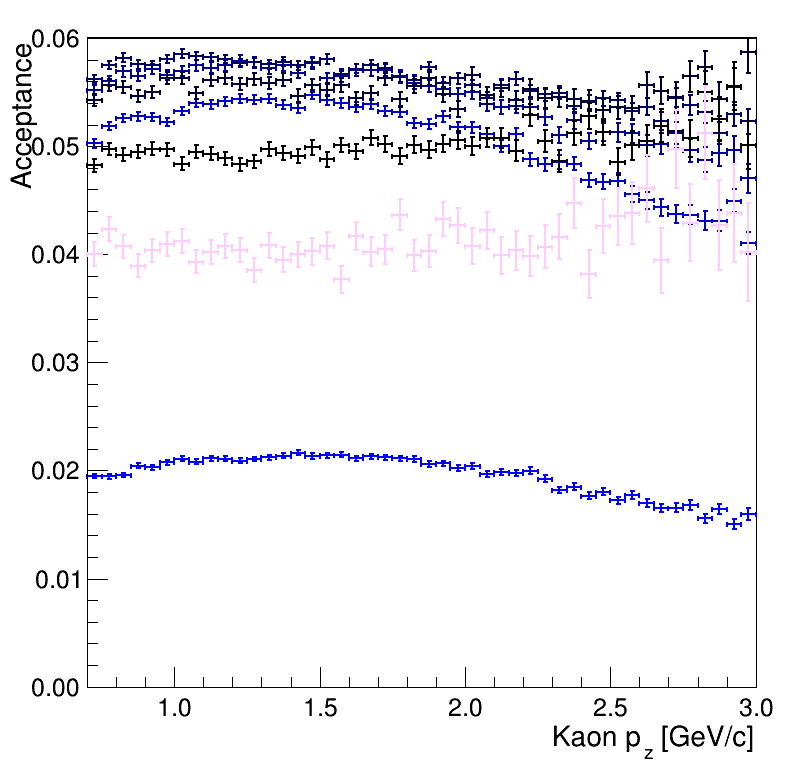

In [37]:
c.Clear()
for i, acc in enumerate(acceptances):
    acc.SetLineColor(ROOT.kBlue+i)
    acc.SetMarkerColor(ROOT.kBlue+i)
    acc.Draw("E1 SAME")
c.Draw()